## ``Fazendo o Pré-processamento e o Pipeline``

In [1]:
# Importando a biblioteca
import pandas as pd
import os

# Definindo a quantidade de THREADS a ser utilizada pelo KMeans
# Obs.1: suprimindo o aviso de falha de vazamento de memória do windows quando está utilizando o algoritmo KMeans 
# Obs.2: basicamente acontece quando o computador possui mais de um núcleo de processamento, dependendo da versão do Scikit-learn
os.environ["OMP_NUM_THREADS"] = "1"

# Definindo uma contante com o caminho para carregar o arquivo csv 
DADOS = "../dados/Mall_Customers_no_CustomerID.csv"

# Carregando o arquivo csv e criando o DataFrame
df = pd.read_csv(DADOS)

# Exibindo as 5 primeiras linhas do DataFrame
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# 1) Fazendo o pré-processamento

#### Conforme o Pandas Profiling Report:
- Temos 01 Coluna Categórica e portanto utilizaremos o OneHotEncoder;
- Temos 03 Colunas Numéricas e portanto utilizaremos o StandardScaler (para os casos de comportamento da Curva Normal);

In [2]:
# Importando as bibliotecas 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Aplicando as transformações (pré-processamento) às Colunas e atribuindo à variável "preprocessing"
# Obs.1: passando uma lista com uma tupla que contém com o nome da etapa, quem vai fazer a transformação e a lista das colunas; e 
# Obs.2: a outra tupla que contém o nome da etapa, quem vai fazer a transformação e o nome da coluna
preprocessing = ColumnTransformer(
    [
        ("standard", StandardScaler(), ["Age", "Annual Income (k$)", "Spending Score (1-100)"]),
        ("onehot", OneHotEncoder(), ["Gender"])
    ]
)

# Fazendo o fit e colocando o resultado da transformação em um Novo DataFrame
df_scaled = pd.DataFrame(
    # Fazendo o fit
    preprocessing.fit_transform(df),
    # Pegando e passando os nomes de saída das colunas para o DataFrame
    columns = preprocessing.get_feature_names_out(),
)

# Exibindo as 5 primeiras linhas do DataFrame
df_scaled.head()

,standard__Age,standard__Annual Income (k$),standard__Spending Score (1-100),onehot__Gender_Female,onehot__Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


In [3]:
# Visualizando o objeto preprocessing
preprocessing

ColumnTransformer(transformers=[('standard', StandardScaler(),
                                 ['Age', 'Annual Income (k$)',
                                  'Spending Score (1-100)']),
                                ('onehot', OneHotEncoder(), ['Gender'])])

In [4]:
# Visualizando os Nomes das Colunas (Features, Variáveis) de Entrada no pré-processamento
preprocessing.feature_names_in_

array(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype=object)

In [5]:
# Visualizando os Nomes das Colunas (Features, Variáveis) de Saída do pré-processamento
preprocessing.get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [6]:
# Salvando/Exportando, após o Pré-processamento, para um Novo Arquivo CSV, sem os índices, na pasta dados
df_scaled.to_csv("../dados/Mall_Customers_no_CustomerID_scaled.csv", index = False)

### Definindo a quantidade de Clusters

- Usando os gráficos dos Métodos Elbow e Silhouette;
- Importando Script genérico com Function criada para a geração dos gráficos;

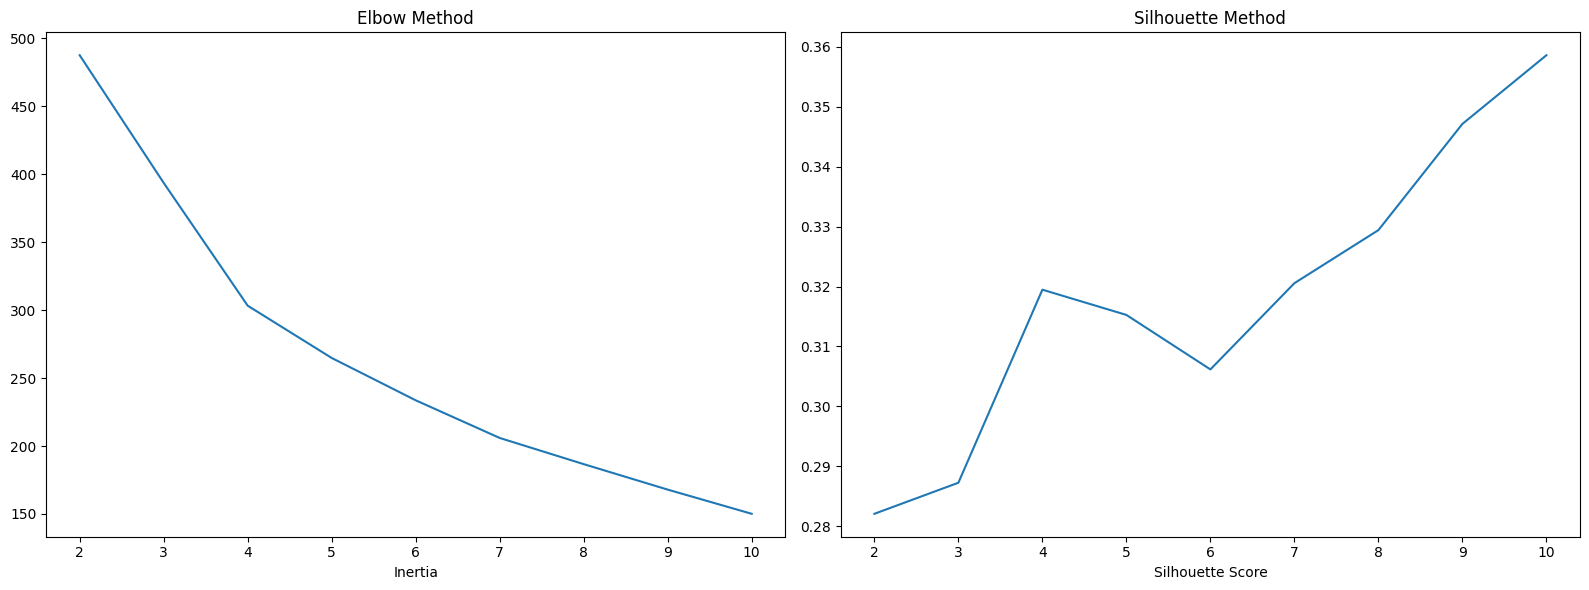

In [7]:
# Importando a Função genérica criada para a geração dos gráficos
from funcoes_auxiliares import graficos_elbow_silhouette

# Chamando a Function e passando como parãmetro o DataFrame
# Obs.:  Por padrão o random_state = 42 e o intervalo_k = (2, 11), se desejar valores diferentes passar como parâmetros
graficos_elbow_silhouette(df_scaled)

### Conclusão: 
- Analisando os gráficos verifica-se que o valor mais razoável para o parâmetro n_clusters = 5

## ``Comparando com os gráficos obtidos Sem o Pré-processamento``

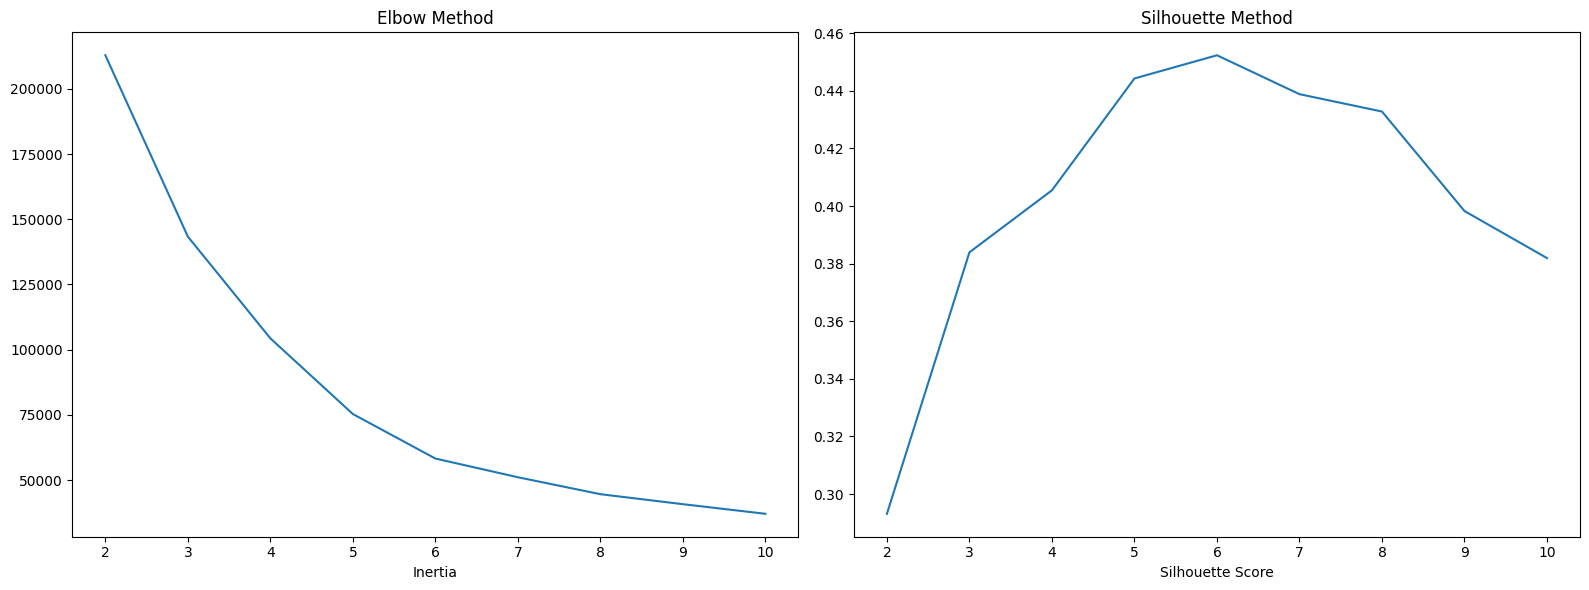


# 2) Fazendo o Pipeline/Clusterização
- A escolha e o treinamento do Modelo;
- Verificando as consequências do pré-processamento;

In [8]:
# Importando as bibliotecas
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Utilizando o Construtor de Pipeline, passando como parâmetros uma Lista contendo 2 Tuplas com as Etapas e atribuindo à variável "pipeline"
# Obs.1: passando na primeira tupla a etapa de preprocessing e a variável "preprocessing"
# Obs.2: passando na segunda tupla a etapa de clusterização, o algoritmo KMeans e os parâmetros
pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("clustering", KMeans(n_clusters = 5, random_state = 42, n_init = 10))
    ]
)

# Fazendo o fit do DataFrame
pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('clustering',
                 KMeans(n_clusters=5, n_init=10, random_state=42))])

### Salvando/Exportando o Modelo

In [9]:
# Importando a biblioteca
import joblib

# Salvando/Exportando para a Pasta Modelo
joblib.dump(pipeline, "../modelos/pipeline_preprocessing_clustering.pkl")

['../modelos/pipeline_preprocessing_clustering.pkl']

In [10]:
# Verificando os passos do Pipeline, acessando as etapas pelos nomes que foram dados 
pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('standard', StandardScaler(),
                                  ['Age', 'Annual Income (k$)',
                                   'Spending Score (1-100)']),
                                 ('onehot', OneHotEncoder(), ['Gender'])]),
 'clustering': KMeans(n_clusters=5, n_init=10, random_state=42)}

In [11]:
# Visualizando os labels (Clusters) da etapa de clustering
pipeline["clustering"].labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2, 1, 2, 4, 2,
       1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 4,
       1, 2, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [12]:
# Criando uma cópia do DataFrame Original
df_clustered = df.copy()

# Criando uma coluna "cluster" e preenchendo com os valores recebidos de pipeline["clustering"].labels_
df_clustered["cluster"] = pipeline["clustering"].labels_

# Exibindo as 5 primeiras linhas do DataFrame
df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


# 3) Construindo gráficos PAIRPLOT's e BOXPLOT's

## Pairplot's com o Tratamento (Pré-processamento)

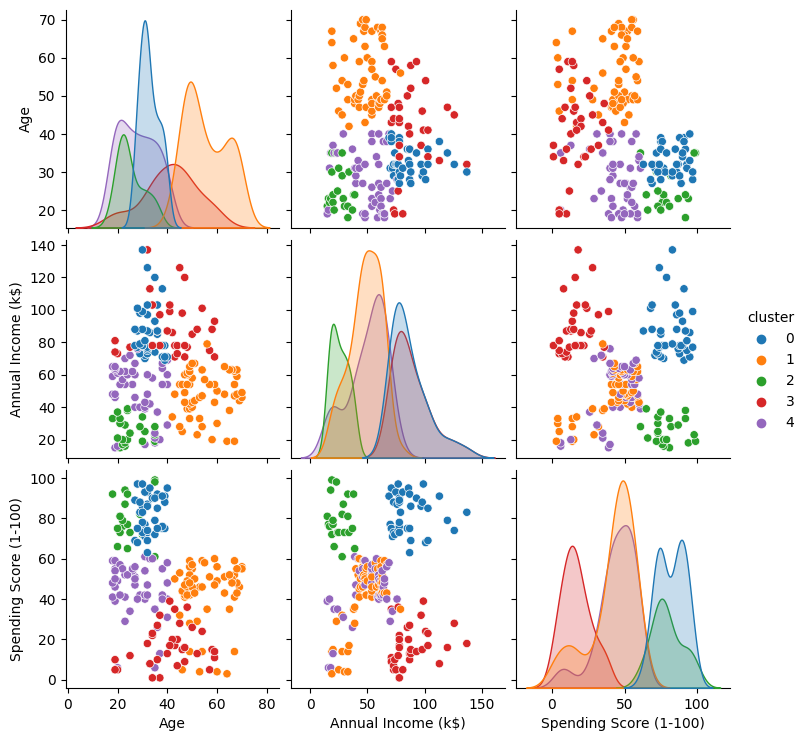

In [13]:
# Importando a biblioteca
import seaborn as sns

# Plotando pairplot do tipo kde nas diagonais
sns.pairplot(df_clustered, diag_kind = "kde", hue = "cluster", palette = "tab10");

## ``Comparando com os Pairplot's Sem Tratamento (Pré-processamento)``
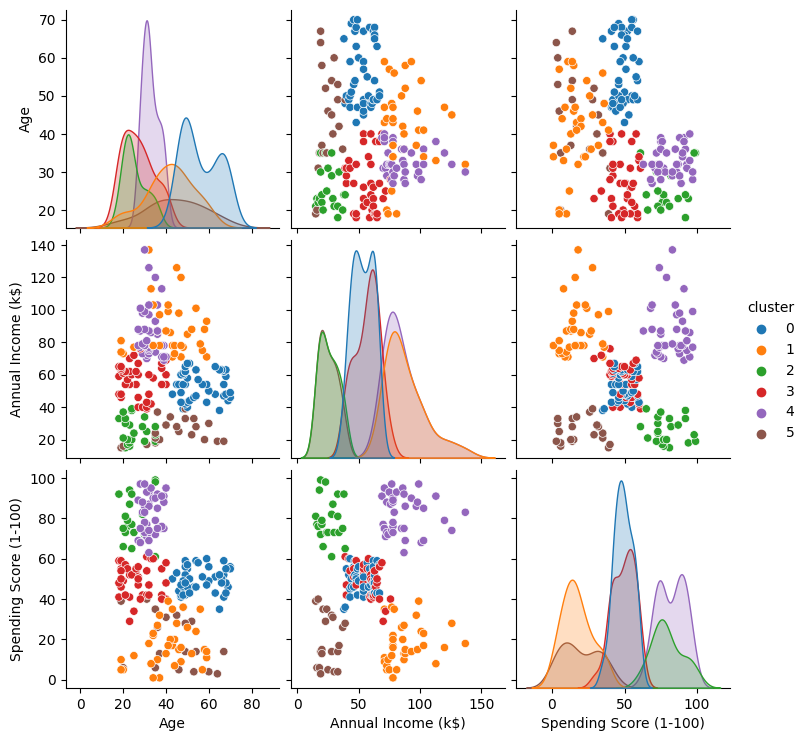

## BoxPlot's com o Tratamento (Pré-processamento)

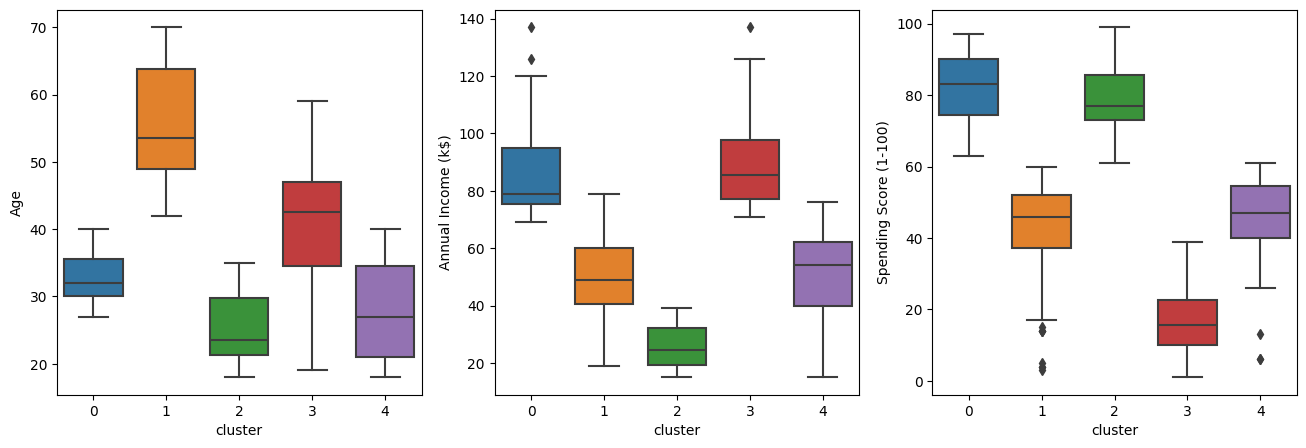

In [14]:
# Importando a biblioteca
import matplotlib.pyplot as plt

# Criando a figura com 1 linha e 3 colunas 
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 5))

# Percorrendo cada Eixo e cada Coluna, usando o zip para juntar o sistema de eixos axs para as colunas de tipo numérico
# Obs.: usando o select_dtypes() para selecionar as colunas por tipo 
for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    # Criando um BoxPlot usando como fonte de dados o DataFrame, o eixo x os clusters, eixo y as colunas e ax o sistema de eixos
    sns.boxplot(data = df_clustered, x = "cluster", y = col, ax = ax)

# Exibindo o gráfico    
plt.show()

## ``Comparando com os BoxPlot's Sem Tratamento (Pré-processamento)``
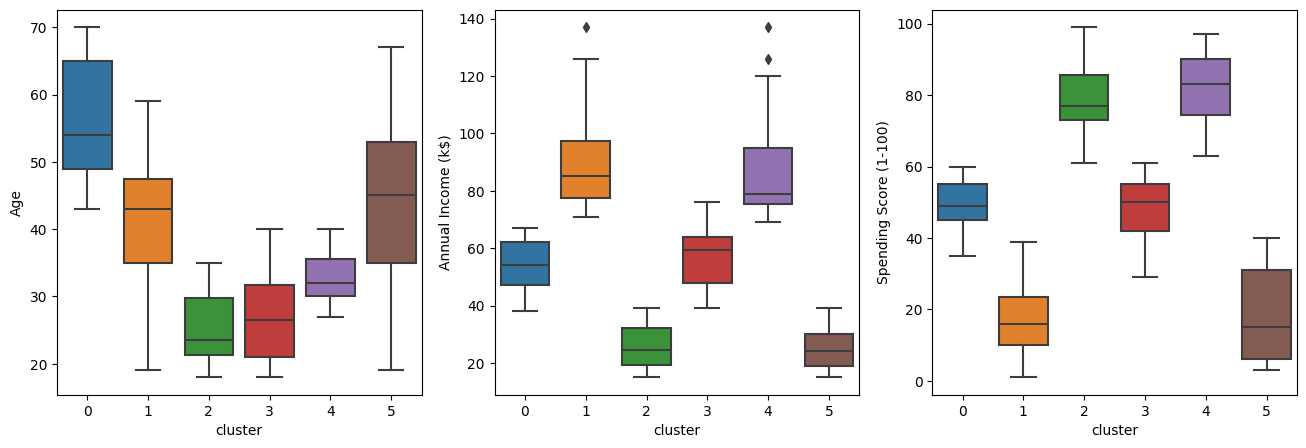

## Criando um perfil para cada Cluster com base no gráfico BoxPlot
Fazendo a personificação dos Clusters

- Cluster 0 - pontuação de gastos alta, renda alta, idade jovem
- Cluster 1 - pontuação de gastos moderada, renda moderada, idade alta
- Cluster 2 - pontuação de gastos alta, renda baixa, idade jovem
- Cluster 3 - pontuação de gastos baixa, renda alta, idade moderada
- Cluster 4 - pontuação de gastos moderada, renda moderada, idade jovem

Transformando os pontos acima em uma tabela

| Pontuação de Gastos | Renda | Idade | Cluster |
|---------------------|-------|-------|---------|
| Alta                | Alta  | Jovem | 0       |
| Moderada            | Moderada | Alta | 1       |
| Alta                | Baixa | Jovem | 2       |
| Baixa               | Alta  | Moderada | 3       |
| Moderada            | Moderada | Jovem | 4       |


## Verificando se cada Cluster tem uma quantidade de clientes significativa

In [15]:
# Verificando a quantidade de clientes em cada cluster
# Obs.1: usando o .value_counts() para fazer a contagem 
# Obs.2: usando o .sort_index() para classificar 
df_clustered["cluster"].value_counts().sort_index()

0    39
1    58
2    22
3    34
4    47
Name: cluster, dtype: int64

## Analisando os Clusters por Generos

### Quantidade de clientes de cada genero por cluster:

In [16]:
# Fazendo o agrupamento da quantidade de clientes por cluster e por genero
# Obs.: usando o parâmetros .size() para obter a quantidade
df_clustered.groupby(["cluster", "Gender"]).size()

cluster  Gender
0        Female    21
         Male      18
1        Female    33
         Male      25
2        Female    13
         Male       9
3        Female    14
         Male      20
4        Female    31
         Male      16
dtype: int64

## Visualizando no BoxPlot os Clusters por Generos

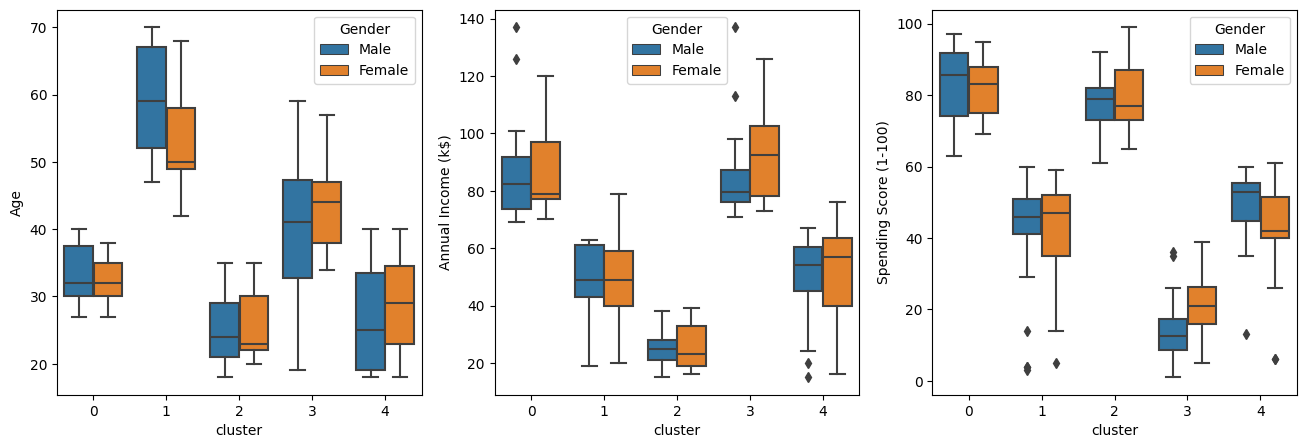

In [17]:
# Criando uma figura com 1 linha e 3 colunas
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 5))

# Percorrendo cada Eixo e cada Coluna, usando o zip para juntar o sistema de eixos axs para as colunas de tipo numérico
# Obs.: usando o select_dtypes() para selecionar as colunas por tipo
for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    # Criando um BoxPlot usando como fonte de dados o DataFrame, o eixo x os clusters, eixo y as colunas, o ax o sistema de eixos e o hue para o Gender
    sns.boxplot(data = df_clustered, x = "cluster", y = col, ax = ax, hue = "Gender")

# Exibindo o gráfico    
plt.show()

## ``Comparando com os BoxPlot's Sem Tratamento (Pré-processamento)``
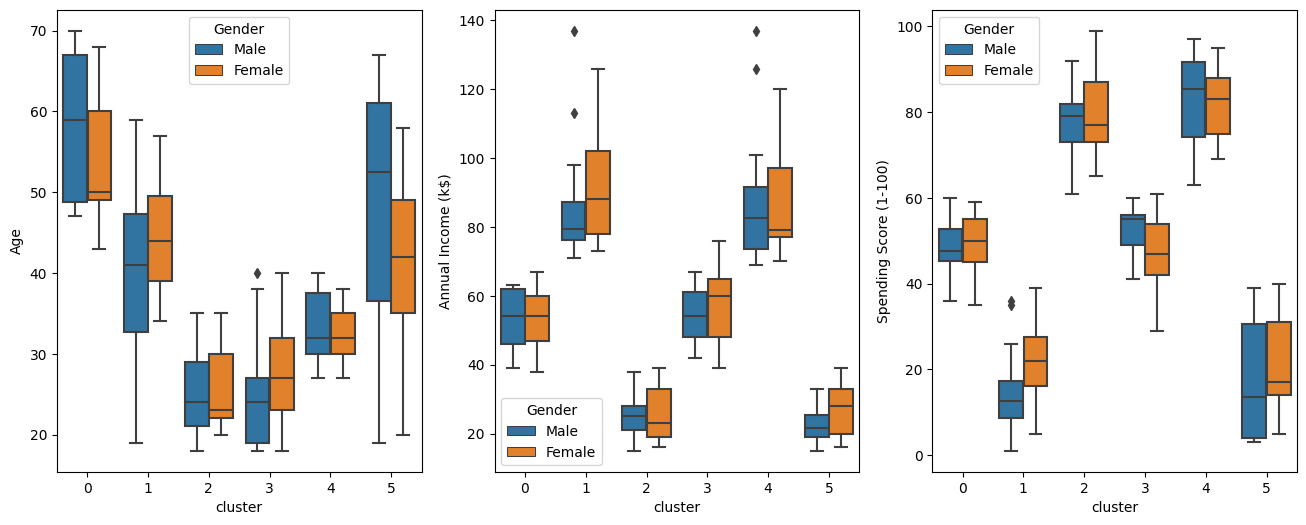

## Preparando para fazer o Gráfico em 3 Dimensões

In [18]:
# Visualizando os Nomes das Colunas (Features, Variáveis) de Saída do pré-processamento
pipeline["preprocessing"].get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [19]:
# Pegando do algoritmo KMeans os centros dos clusters
# Obs.1: o KMeans está centralizado no Pipeline na etapa de clusterização
# Obs.2: são 5 colunas ou coordenadas para cada cluster, sendo 3 oriundas do StandardScaler e 2 do OnehotEncoder no pré-processamento
pipeline["clustering"].cluster_centers_

array([[-0.44191719,  0.99158305,  1.23950275,  0.53846154,  0.46153846],
       [ 1.19862745, -0.46098141, -0.32703818,  0.56896552,  0.43103448],
       [-0.97439592, -1.32954532,  1.13217788,  0.59090909,  0.40909091],
       [ 0.17329545,  1.06645385, -1.2980103 ,  0.41176471,  0.58823529],
       [-0.78172248, -0.40306917, -0.21591396,  0.65957447,  0.34042553]])

In [20]:
# Pegando 03 coordenadas dos centros dos clusters, excluindo as 2 colunas onehot__Gender_Female e onehot__Gender_Male
# Obs.1: para reproduzir o Gráfico em 3D é necessário tirar a informações de genero
# Obs.2: excluindo as colunas do array utilizando o slicing para pegar todas as colunas menos as 2 últimas ".cluster_centers_[:, :-2]"
# Obs.3: com isso, a visualização não será completa, mas veremos como solucionar esta questão oportunamente.
pipeline["clustering"].cluster_centers_[:, :-2]

array([[-0.44191719,  0.99158305,  1.23950275],
       [ 1.19862745, -0.46098141, -0.32703818],
       [-0.97439592, -1.32954532,  1.13217788],
       [ 0.17329545,  1.06645385, -1.2980103 ],
       [-0.78172248, -0.40306917, -0.21591396]])

In [21]:
# Atribuindo as 03 coordenadas dos centros dos clusters à variável "centroids"
centroids = pipeline["clustering"].cluster_centers_[:, :-2]

# Visualizando as 03 coordenadas dos centros dos clusters
centroids

array([[-0.44191719,  0.99158305,  1.23950275],
       [ 1.19862745, -0.46098141, -0.32703818],
       [-0.97439592, -1.32954532,  1.13217788],
       [ 0.17329545,  1.06645385, -1.2980103 ],
       [-0.78172248, -0.40306917, -0.21591396]])

In [22]:
# Instalando o ipympl 
# Obs.: efetuando uma interface interativa no gráfico 3D (funciona somente numa célula Jupyter)
# !pip install ipympl

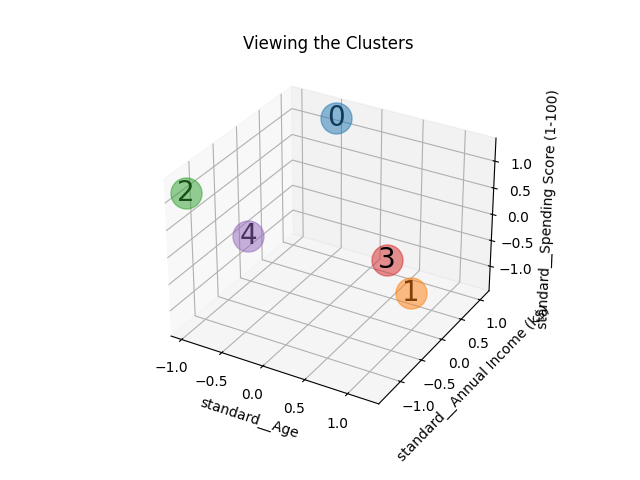

In [23]:
# Descomentar para ter uma visualização interativa
# %matplotlib ipympl

# Importando a Função genérica criada para a visualização de clusters
from funcoes_auxiliares import visualizar_clusters

# Chamando a função passando alguns parâmetros
visualizar_clusters(
    # Passando como parâmetros para o dataframe o df_scaled que foi obtido no pré-processamento
    dataframe = df_scaled,
    # Passando como parâmetro as 3 colunas oriundas do StandardScaler
    colunas = ['standard__Age', 'standard__Annual Income (k$)', 'standard__Spending Score (1-100)'],
    # Passando como parâmetro quantidade de cores a quantidade de clusters que foi definida
    quantidade_cores = 5,
    # Passando como parâmetro centroids a variável centroids definida
    centroids = centroids,
)

### Observação:
- Nota-se que foi possível separar os 5 Clusters mesmo tendo excluído as informações dos generos

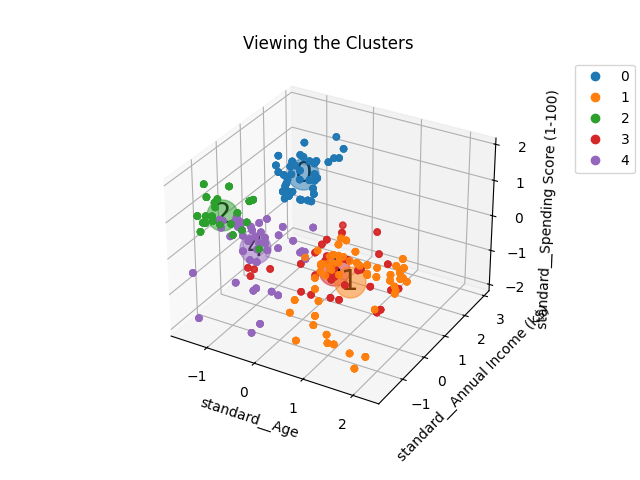

In [24]:
# Chamando a função passando mais alguns parâmetros
visualizar_clusters(
    # Passando como parâmetros para o dataframe o df_scaled que foi obtido no pré-processamento
    dataframe = df_scaled,
    # Passando como parâmetro as 3 colunas oriundas do StandardScaler
    colunas = ['standard__Age', 'standard__Annual Income (k$)', 'standard__Spending Score (1-100)'],
    # Passando como parâmetro quantidade de cores a quantidade de clusters que foi definida
    quantidade_cores = 5,
    # Passando como parâmetro centroids a variável centroids definida
    centroids = centroids,
    # Passando o parâmetro para exibição dos pontos
    mostrar_pontos = True,
    # Passando como parâmetro a coluna "cluster" do DataFrame clusterizado "df_clustered"
    coluna_clusters = df_clustered["cluster"]
)